In [1]:
import json
base_path = "/home/s4kibart/vision-retrieval/data/eval_all"
query_images = f"{base_path}/microtexts-retrieval-complex/srip"
query_name = "cap_rent_increases"

queries_texts = "/home/s4kibart/vision-retrieval/data/retrieval_queries/microtexts-retrieval-complex"
query_text = f"{queries_texts}/{query_name}.json"
query_image = f"{query_images}/{query_name}.png"


with open(query_text, "r") as f:
    query_text = json.load(f)
reference_rankings = {k.split("/")[1]: 4-v for k, v in query_text["userdata"]["cbrEvaluations"][0]["ranking"].items()}

In [2]:
reference_rankings

{'nodeset6369': 3,
 'nodeset6377': 1,
 'nodeset6384': 1,
 'nodeset6418': 1,
 'nodeset6455': 1,
 'nodeset6465': 2}

In [3]:
casebase_path = f"{base_path}/casebase/srip"
casebase_images = [f"{casebase_path}/{n}.png" for n in reference_rankings.keys()]
casebase_images

['/home/s4kibart/vision-retrieval/data/eval_all/casebase/srip/nodeset6369.png',
 '/home/s4kibart/vision-retrieval/data/eval_all/casebase/srip/nodeset6377.png',
 '/home/s4kibart/vision-retrieval/data/eval_all/casebase/srip/nodeset6384.png',
 '/home/s4kibart/vision-retrieval/data/eval_all/casebase/srip/nodeset6418.png',
 '/home/s4kibart/vision-retrieval/data/eval_all/casebase/srip/nodeset6455.png',
 '/home/s4kibart/vision-retrieval/data/eval_all/casebase/srip/nodeset6465.png']

In [7]:
from PIL import Image
import base64
import io

IMG_PLACEHOLDER = "data:image/png;base64,"

def image_to_base64(image: Image.Image) -> str:
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return IMG_PLACEHOLDER + base64.b64encode(buffered.getvalue()).decode("utf-8")

def append_images(image) -> dict:
    return {"role": "user", "content": [{"type": "image_url", "image_url": {"url": image_to_base64(Image.open(image).convert("RGB"))}}]}

In [8]:
prompt_messages = [{"role": "system", "content": "You are an assistant that specializes in retrieving argument graphs based on their visualizations."}, {"role": "user", "content": f"Take a look at the following images in space reclaiming icicle chart visualization. Image 1 represents the query, images 2-{1+len(reference_rankings.keys())} are retrieval candidates. Please rank all retrieval candidates (images 2-{1+len(reference_rankings.keys())}) in descending order based on their similarity to the query image. If there were, for example, the three retrieval candidates images 2-4, image 3 having the highest similarity, image 2 the second highest and image 4 the lowest, you would output: 3,2,4."},
    { "role": "user", "content": "This is image 1, the query" }]
prompt_messages.append(append_images(query_image))
prompt_messages.append({ "role": "user", "content": f"The following are images 2-{1+len(reference_rankings.keys())}, retrieval candidates:" })
for img in casebase_images:
    prompt_messages.append(append_images(img))
prompt_messages.append({ "role": "user", "content": "The correct order of the retrieval images is:" })
#prompt_messages

[{'role': 'system',
  'content': 'You are an assistant that specializes in retrieving argument graphs based on their visualizations.'},
 {'role': 'user',
  'content': 'Take a look at the following images in space reclaiming icicle chart visualization. Image 1 represents the query, images 2-7 are retrieval candidates. Please rank all retrieval candidates (images 2-7) in descending order based on their similarity to the query image. If there were, for example, the three retrieval candidates images 2-4, image 3 having the highest similarity, image 2 the second highest and image 4 the lowest, you would output: 3,2,4.'},
 {'role': 'user', 'content': 'This is image 1, the query'},
 {'role': 'user',
  'content': [{'type': 'image_url',
    'image_url': {'url': ''}}]},
 {'role': 'user',
  'content': 'The following are images 2-7, retrieval candidates:'},
 {'role': 'user',
  'content': [{'type': 'image_url',
    'image_url': {'url': ''}}]},
 {'role': 'user',
  'content': [{'type': 'image_url',
 
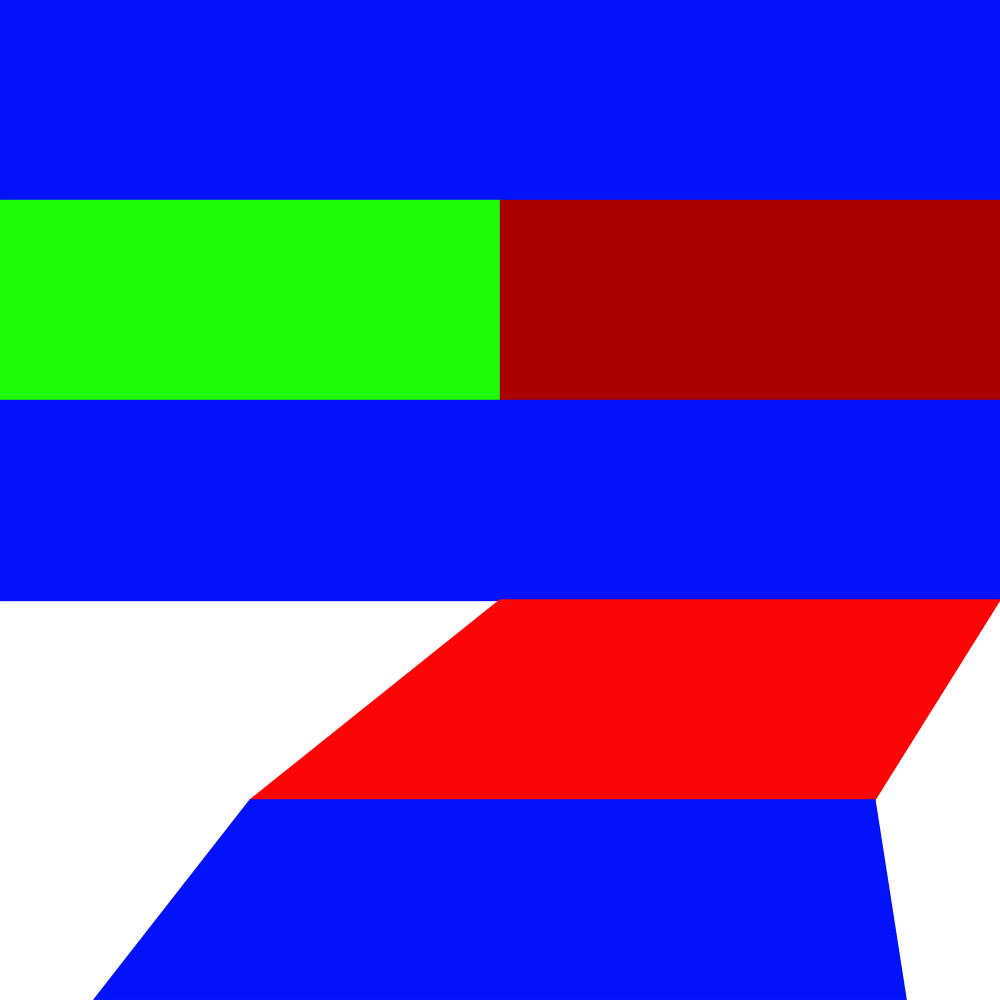
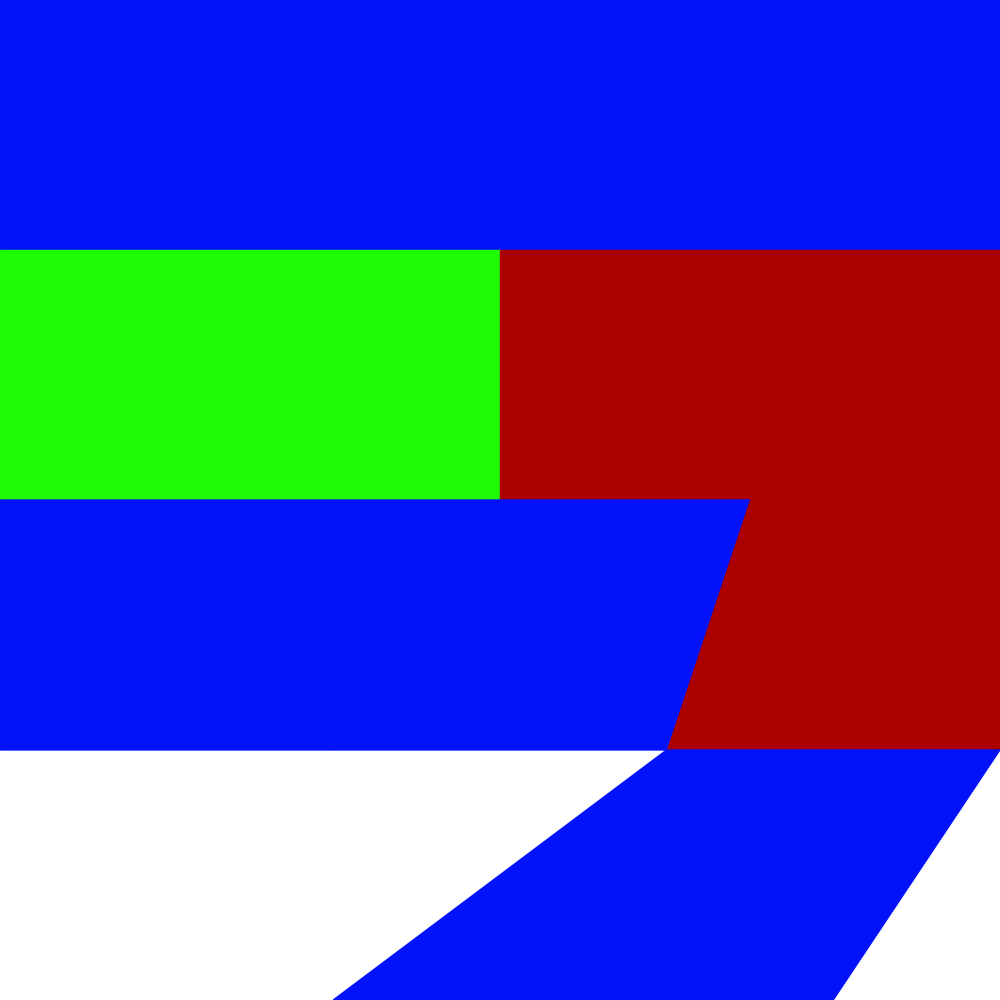
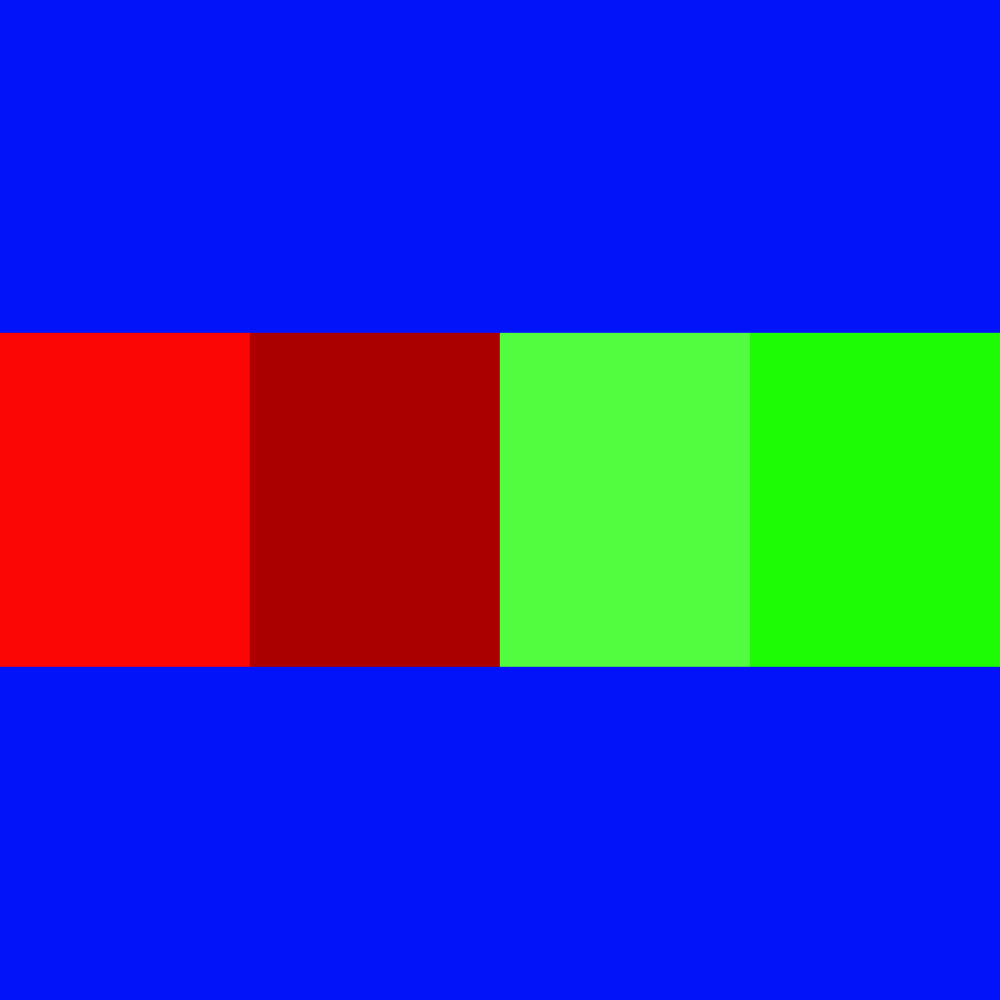
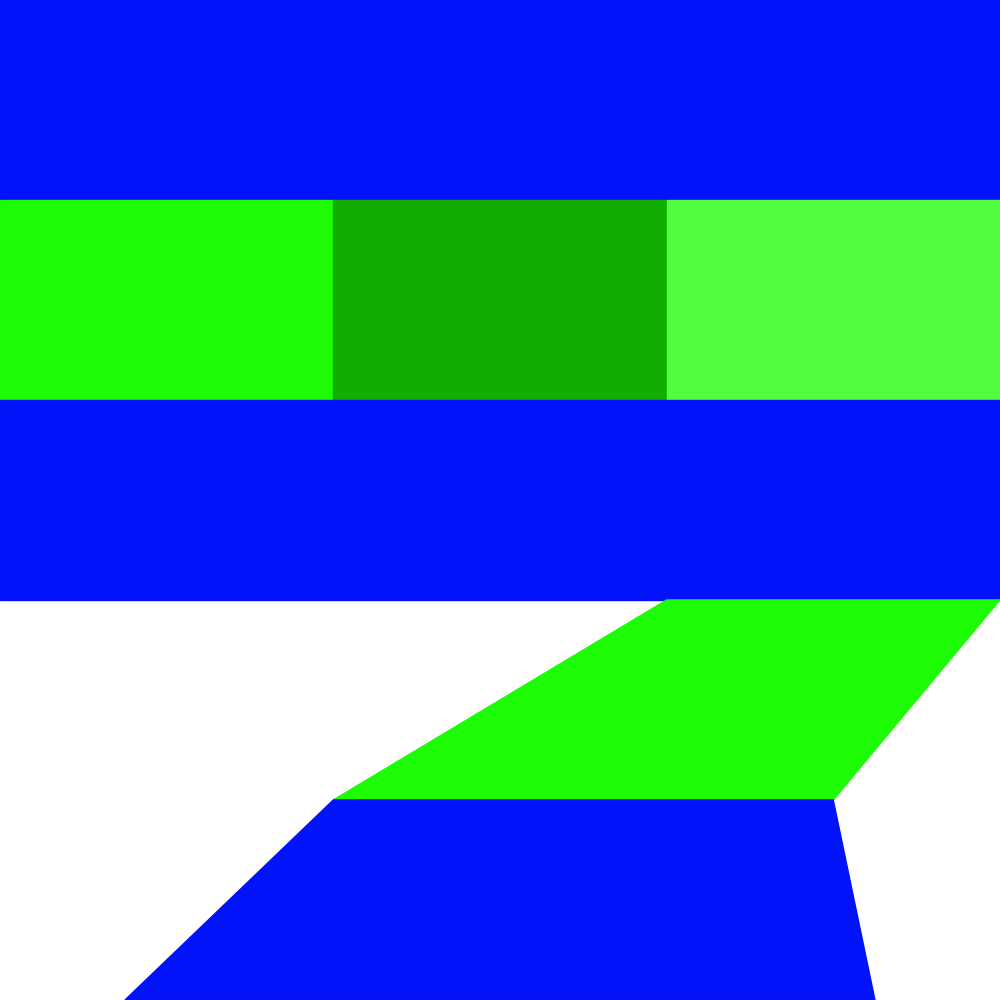
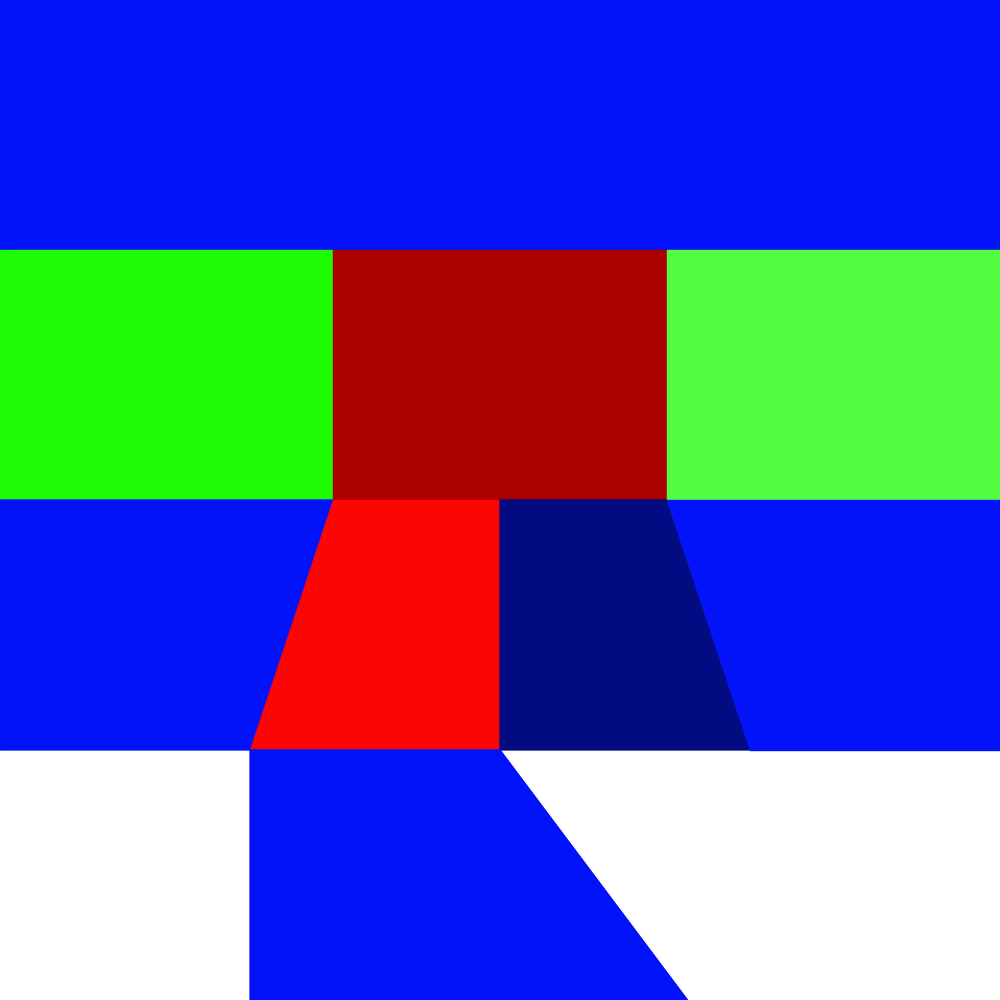
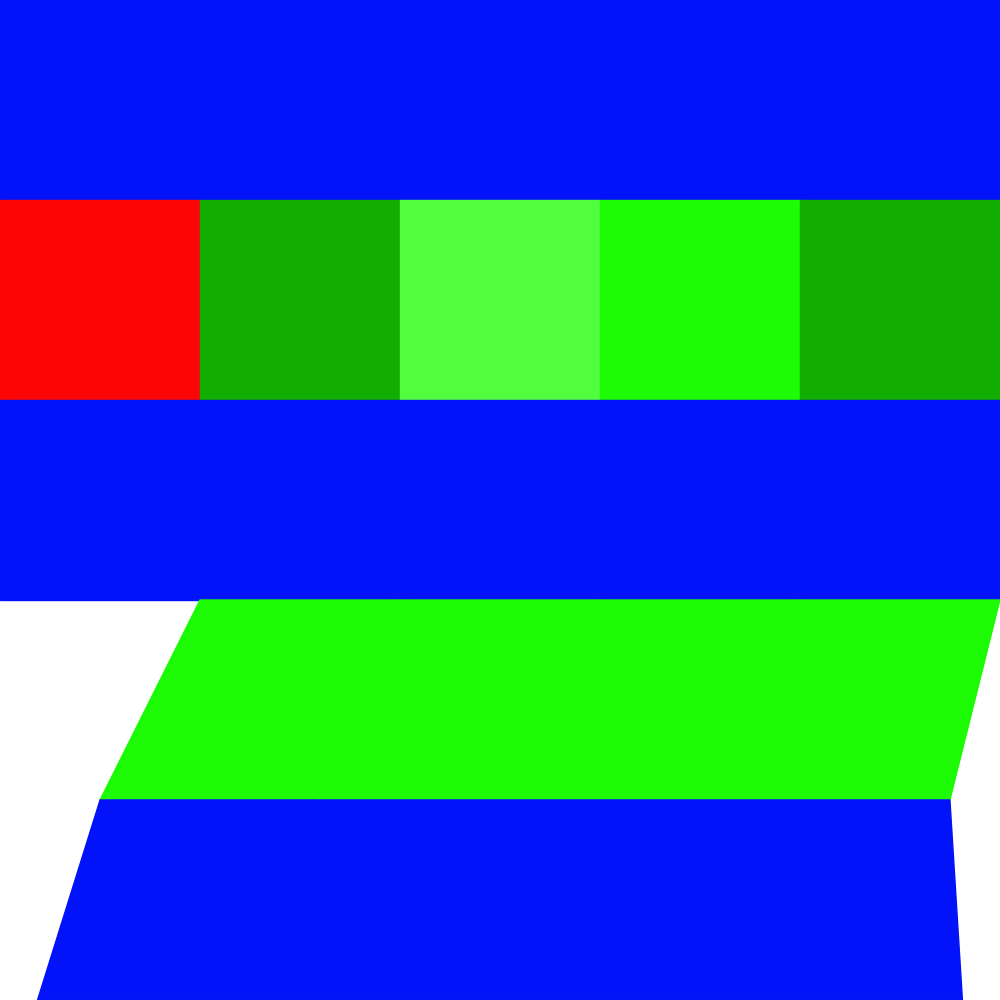
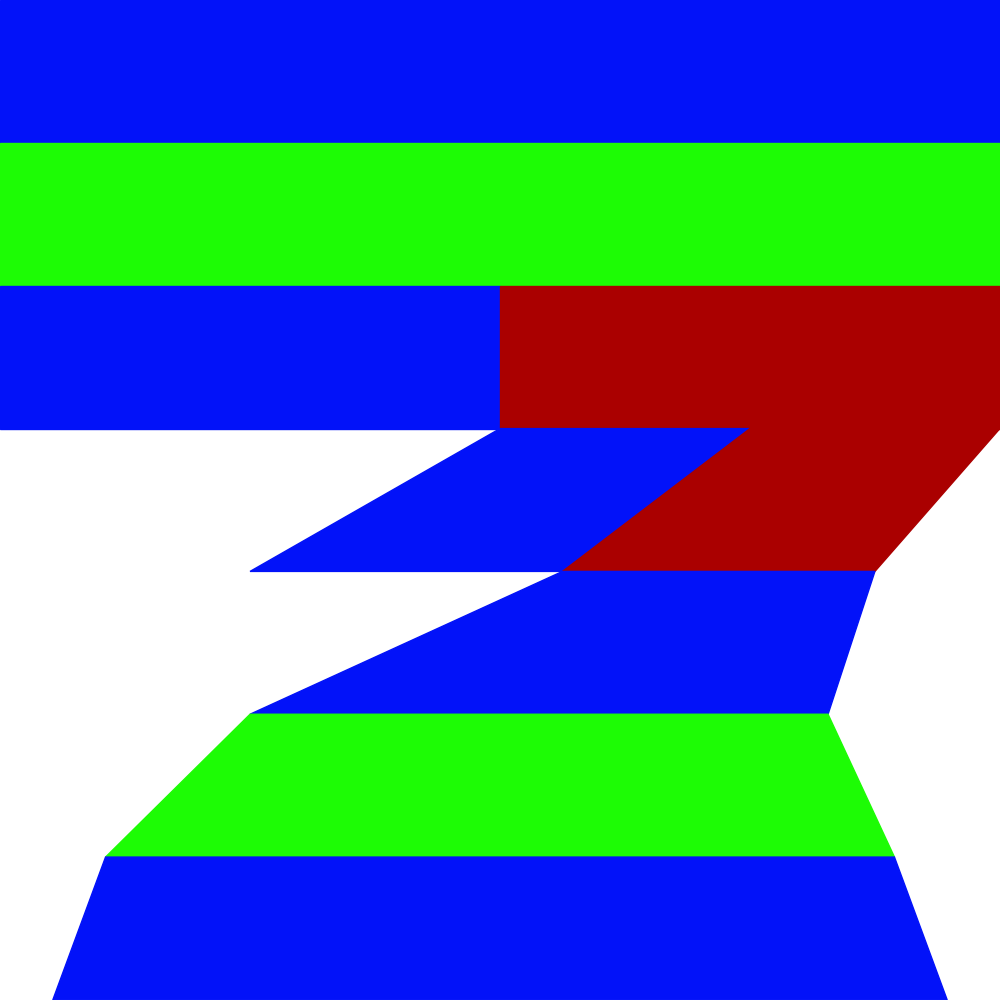

In [9]:
prompt_messages

In [10]:
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv()  # take environment variables from .env.

client = OpenAI()
models = client.models.list()

print(models)


SyncPage[Model](data=[Model(id='o1-preview', created=1725648897, object='model', owned_by='system'), Model(id='o1-preview-2024-09-12', created=1725648865, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='whisper-1', created=1677532384, object='model', owned_by='openai-internal'), Model(id='gpt-4o-2024-08-06', created=1722814719, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct', created=1692901427, object='model', owned_by='system'), Model(id='gpt-4o', created=1715367049, object='model', owned_by='system'), Model(id='gpt-4o-mini-2024-07-18', created=1721172717, object='model', owned_by='system'), Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'), Model(id='gpt-4o-mini', created=1721172741, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system'), Model(id='babbage-002', created=1692634615, object='m

In [9]:
completion = client.chat.completions.create(
  model="ft:gpt-4o-2024-08-06:wi2-trier-university:srip-900x2:APyQjzsR:ckpt-step-899",
  messages=prompt_messages
)
completion

ChatCompletion(id='chatcmpl-ATboxn8DG5Gcip35J2Tp8ygxPLvUD', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='2,7,5,6,3,4', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1731620259, model='ft:gpt-4o-2024-08-06:wi2-trier-university:srip-900x2:APyQjzsR:ckpt-step-899', object='chat.completion', service_tier=None, system_fingerprint='fp_4da243c00f', usage=CompletionUsage(completion_tokens=11, prompt_tokens=5556, total_tokens=5567, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [45]:
answer = completion.choices[0].message.content

In [49]:
order = [int(i) for i in answer.split(",")]
keys = list(reference_rankings.keys())
assert len(set(order)) == len(reference_rankings), "Rankings must be unique and equal to the number of images"
assert set(order) == set(range(2, len(reference_rankings)+2)), "Rankings must be a permutation of 1 to N"
simulated_sims = {keys[idx-2]: 1-.1*(pos+1) for pos, idx in enumerate(order)}
simulated_sims


{'nodeset6369': 0.9,
 'nodeset6465': 0.8,
 'nodeset6418': 0.7,
 'nodeset6377': 0.6,
 'nodeset6455': 0.5,
 'nodeset6384': 0.3999999999999999}

In [47]:
reference_rankings

{'nodeset6369': 3,
 'nodeset6377': 1,
 'nodeset6384': 1,
 'nodeset6418': 1,
 'nodeset6455': 1,
 'nodeset6465': 2}

In [48]:
from correctness_completeness import _correctness_completeness_single
_correctness_completeness_single(reference_rankings, simulated_sims, None)

(1.0, 1.0)

In [1]:
import json
from glob import glob
from PIL import Image
import base64
import io
from dotenv import load_dotenv
from openai import OpenAI
from correctness_completeness import _correctness_completeness_single
from ranx import Run, Qrels, evaluate
import statistics
from tqdm import tqdm

load_dotenv()  # take environment variables from .env.

client = OpenAI()
IMG_PLACEHOLDER = "data:image/png;base64,"


def as_dict(queries, results, qrels, run, k):
    correctness, completeness = [], []
    for query in queries:
        corr, comp = _correctness_completeness_single(
            qrels[query.name], run[query.name], k
        )
        correctness.append(corr)
        completeness.append(comp)
    results["correctness"] = statistics.mean(correctness)
    results["completeness"] = statistics.mean(completeness)
    return results


def image_to_base64(image: Image.Image) -> str:
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return IMG_PLACEHOLDER + base64.b64encode(buffered.getvalue()).decode("utf-8")


def append_images(image) -> dict:
    return {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {"url": image_to_base64(Image.open(image).convert("RGB"))},
            }
        ],
    }


base_path = "/home/s4kibart/vision-retrieval/data/eval_all"
ranking_save_path = f"{base_path}/ranking_oai.json"
results_path = f"{base_path}/results_oai.json"
query_images = f"{base_path}/microtexts-retrieval-complex/srip"

queries_texts = "/home/s4kibart/vision-retrieval/data/retrieval_queries/microtexts-retrieval-complex"

res = {}
ranking_oai = {}
qrels = {}
run = {}

query_names = [
    path.split("/")[-1].split(".")[0] for path in glob(f"{queries_texts}/*.json")
]
query_names

['txl_airport_remain_operational_after_ber_opening',
 'stricter_regulation_of_intelligence_services',
 'higher_dog_poo_fines',
 'eu_influence_on_political_events_in_ukraine',
 'public_broadcasting_fees_on_demand',
 'increase_weight_of_ba_thesis_in_final_grade',
 'cap_rent_increases',
 'school_uniforms',
 'charge_tuition_fees',
 'keep_retirement_at_63',
 'make_video_games_olympic',
 'health_insurance_cover_complementary_medicine',
 'introduce_capital_punishment',
 'over_the_counter_morning_after_pill']